# Filtering for entries with Humboldt County

Humboldt County has the most obligations in the dataset, prompting us to wonder what types of obligations are going to this county.

In [1]:
import pandas as pd
from siuba import _, mutate, count, filter, group_by, ungroup, summarize, show_query, arrange, collect

import numpy as np
from sqlalchemy import create_engine
from siuba.sql import LazyTbl

In [2]:
#! pip install plotnine

In [3]:
from plotnine import *

In [4]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = "{:.2f}".format

In [5]:
df = pd.read_csv('gs://calitp-analytics-data/data-analyses/dla/e-76Obligated/clean_obligated_waiting.csv', low_memory=False)

/opt/conda/lib/python3.9/site-packages/google/auth/_default.py:73: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. We recommend you rerun `gcloud auth application-default login` and make sure a quota project is added. Or you can use service accounts instead. For more information about service accounts, see https://cloud.google.com/docs/authentication/


In [6]:
df.head()

,Unnamed: 0,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,warning,projectID,projectNO,compare_id_locode
0,0,Obligated,BPMPL,5904(121),Humboldt County,2018-12-18,2018-12-18,2018-12-18,2018-12-18,2018-12-27,0.00,0.00,0.00,Authorized,5904,1,E-76 approved on,NaN,0.00,9.00,HBPLOCAL,14 Bridges In Humboldt County,Bridge Preventive Maintenance - Deck Joints,3,NaN,NaN,NON-MPO,NaN,5904,121,True
1,1,Obligated,ER,32D0(008),Mendocino County,2018-12-17,2018-12-19,2018-12-20,2018-12-20,2018-12-27,11508.00,0.00,13000.00,Authorized,5910,1,E-76 approved on,1.00,1.00,7.00,NaN,"Comptche Ukiah Road, Cr 223 Pm 17.25",Permanent Restoration,3,2018-12-17,2018-12-18,NON-MPO,NaN,32D0,8,False
2,2,Obligated,ER,4820(004),Humboldt County,2018-12-07,2018-12-21,2018-12-21,2018-12-21,2018-12-27,45499.64,0.00,51394.58,Authorized,5904,1,E-76 approved on,14.00,0.00,6.00,NaN,Mattole Rd Pm 43.17,Permanent Restoration,5,2018-12-06,2018-12-07,NON-MPO,NaN,4820,4,False
3,3,Obligated,CML,5924(244),Sacramento County,2018-12-11,2018-12-11,2018-12-21,2018-12-27,2018-12-27,207002.00,0.00,247002.00,Authorized,5924,3,E-76 approved on,4.00,16.00,0.00,SAC25086,Fair Oaks Blvd. Between Howe Ave And Munroe St,Create A Smart Growth Corridor With Barrier Se...,1,2018-12-07,2018-12-07,SACOG,NaN,5924,244,True
4,4,Obligated,CML,5924(214),Sacramento County,2018-12-05,2018-12-11,2018-12-21,2018-12-27,2018-12-27,0.00,5680921.00,5702041.00,Authorized,5924,3,E-76 approved on,7.00,16.00,0.00,SAC24753,Florin Rd Between Power Inn Rd. And Florin Per...,Streetscape (tc),3,2018-11-28,2018-12-04,SACOG,NaN,5924,214,True


In [7]:
cols = ['prepared_date','to_fmis_date','submit_to_fhwa_date','submit__to_hq_date','hq_review_date','date_request_initiated','date_completed_request']
df[cols] = df[cols].applymap(lambda x : pd.to_datetime(x, format = '%Y-%m-%d'))

In [8]:
df.agency.value_counts().sort_values(ascending=False)

Humboldt County                                           631
Los Angeles                                               543
Fresno                                                    467
Santa Cruz County                                         455
Los Angeles County                                        411
                                                         ... 
Port Hueneme                                                1
Humboldt Bay Harbor Recreation & Conservation District      1
Fresno County Rural Transit Agency                          1
Santa Fe Sprgs                                              1
Ala-Con Costa T                                             1
Name: agency, Length: 671, dtype: int64

In [9]:
df >> filter(_.agency.str.contains("Humboldt County"))

,Unnamed: 0,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,warning,projectID,projectNO,compare_id_locode
0,0,Obligated,BPMPL,5904(121),Humboldt County,2018-12-18,2018-12-18,2018-12-18,2018-12-18,2018-12-27,0.00,0.00,0.00,Authorized,5904,1,E-76 approved on,NaN,0.00,9.00,HBPLOCAL,14 Bridges In Humboldt County,Bridge Preventive Maintenance - Deck Joints,3,NaT,NaT,NON-MPO,NaN,5904,121,True
2,2,Obligated,ER,4820(004),Humboldt County,2018-12-07,2018-12-21,2018-12-21,2018-12-21,2018-12-27,45499.64,0.00,51394.58,Authorized,5904,1,E-76 approved on,14.00,0.00,6.00,NaN,Mattole Rd Pm 43.17,Permanent Restoration,5,2018-12-06,2018-12-07,NON-MPO,NaN,4820,4,False
61,61,Obligated,BPMPL,5904(157),Humboldt County,2018-11-13,2018-12-06,2018-12-14,2018-12-14,2018-12-14,21619.00,0.00,24420.00,Authorized,5904,1,E-76 approved on,0.00,8.00,0.00,HBPLOCAL,On Lindley Road At Mattole River (bridge 04c0075),Bridge Preventive Maintenance: Replace Wood Wh...,2,2018-11-13,2018-12-06,NON-MPO,NaN,5904,157,True
179,179,Obligated,ER,32L0(132),Humboldt County,2018-11-09,2018-11-19,2018-11-19,2018-11-21,2018-11-28,80597.93,0.00,82857.19,Authorized,5904,1,E-76 approved on,11.00,2.00,7.00,NaN,"Mattole Rd Pm 36.06 - 36.10, Humboldt County",Emergency Opening Work. Install Warning Signs ...,1,2018-11-07,2018-11-08,NON-MPO,NaN,32L0,132,False
180,180,Obligated,ER,32L0(136),Humboldt County,2018-11-07,2018-11-19,2018-11-19,2018-11-21,2018-11-28,7797.89,0.00,8645.78,Authorized,5904,1,E-76 approved on,12.00,2.00,7.00,NaN,"Mattole Rd Pm 6.50, Humboldt County",Emergency Opening,1,2018-11-07,2018-11-07,NON-MPO,NaN,32L0,136,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20185,20187,HQ,ER,32L0(320),Humboldt County,2021-08-03,2021-10-05,NaT,NaT,NaT,-10392.51,21845.64,13463.69,..,5904,1,Prepared on 8/3/2021,63.00,NaN,NaN,NaN,"In Humboldt County, Mattole Rd Pm 9.00",Permanent Restoration,4,2021-08-03,2021-08-20,NON-MPO,NaN,32L0,320,False
20186,20188,HQ,ER,32L0(325),Humboldt County,2021-08-05,2021-09-27,NaT,NaT,NaT,0.00,467168.87,527695.55,..,5904,1,Prepared on 8/5/2021,61.00,NaN,NaN,NaN,Mattole Rd Pm 36.16,Repair Roadway Slumping And Settlement.,4,2021-07-28,2021-09-22,NON-MPO,NaN,32L0,325,False
20187,20189,HQ,ER,32L0(326),Humboldt County,2021-09-29,2021-09-29,NaT,NaT,NaT,0.00,9154.33,10340.38,..,5904,1,Prepared on 9/29/2021,37.00,NaN,NaN,NaN,Humboldt County On Murray Rd Pm 5.57,Permanent Restoration,7,2021-08-23,2021-08-23,NON-MPO,NaN,32L0,326,False
20190,20192,HQ,ER,4400(046),Humboldt County,2021-09-09,2021-10-13,NaT,NaT,NaT,131198.09,0.00,148196.20,..,5904,1,Prepared on 9/9/2021,43.00,NaN,NaN,NaN,Alderpoint Road Pm 40.21 To 40.70,Emergency Relief Pr Only,4,2021-08-31,2021-09-09,NON-MPO,NaN,4400,46,False


In [10]:
df_hc = df >> filter(_.agency.str.contains("Humboldt County"))

In [11]:
df_hc['prepared_y_m'] = pd.to_datetime(df_hc["prepared_date"].dt.strftime('%Y-%m'))

/tmp/ipykernel_146/721848220.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [12]:
df_hc['prepared_y'] = pd.to_datetime(df_hc["prepared_date"].dt.strftime('%Y'))

/tmp/ipykernel_146/1126982653.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [13]:
print(len(df_hc))

631


In [14]:
df_hc >> count(_.locode) >> arrange(-_.n)

,locode,n
0,5904,631


In [15]:
df_hc >> count(_.compare_id_locode)

,compare_id_locode,n
0,False,477
1,True,154


### What Prefix Codes are fequently used?

In [16]:
df_hc >> count(_.prefix) >> arrange(-_.n)

,prefix,n
9,ER,381
0,ACST-ER,65
4,BPMPL,50
1,ACSTP,31
5,BRLO,22
7,BRLS,20
12,HSIP,20
13,RPSTP,18
6,BRLOZB,9
2,ATP,5


In [17]:
# ER funds, or emergency relief funds, are the most obligated type of funding to the county.

In [18]:
df_hc_count = df_hc >> count(_.prefix) >> arrange(-_.n)

#### What Project IDs occur the most?

In [19]:
df_hc >> group_by(_.prefix) >> count(_.projectID) >> arrange(-_.n)


,prefix,projectID,n
13,ER,32L0,172
11,ER,20A0,117
0,ACST-ER,32L0,63
15,ER,4400,52
6,BPMPL,5904,50
16,ER,4820,31
7,BRLO,5904,22
9,BRLS,5904,20
19,HSIP,5904,20
20,RPSTP,5904,18


In [20]:
df_hc >> group_by(_.prefix) >> count(_.project_no) >> arrange(-_.n)


,prefix,project_no,n
89,BRLO,5904(126),7
98,BRLS,5904(127),7
88,BRLO,5904(113),6
277,HSIP,5904(160),6
280,RPSTP,5904(106),6
...,...,...,...
255,ER,4400(071),1
259,ER,4820(007),1
264,ER,4820(017),1
272,FBDLNI,5904(130),1


In [21]:
# interesting that when we group by the 7-digit project numberm, the top is no longer ER. 

In [22]:
df_hc >> filter(_.prefix=='BRLO', _.project_no=='5904(126)') 



,Unnamed: 0,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,warning,projectID,projectNO,compare_id_locode,prepared_y_m,prepared_y
2512,2512,Obligated,BRLO,5904(126),Humboldt County,2017-11-08,2018-02-06,2018-02-09,2018-02-09,2018-02-15,346000.00,0.00,346000.00,Authorized,5904,1,E-76 approved on,92.00,3.00,6.00,HBPLOCAL,Jacoby Creek Bridge On Brookwood Drive ( Br 04...,Bridge Rehabilitation (tc),6,2017-11-06,2017-11-06,NON-MPO,NaN,5904,126,True,2017-11-01,2017-01-01
4407,4407,Obligated,BRLO,5904(126),Humboldt County,2017-04-27,2017-05-10,2017-05-11,2017-05-15,2017-05-16,505000.00,0.00,505000.00,Authorized,5904,1,E-76 approved on Prepared on 2/14/2017,13.00,5.00,1.00,HBPLOCAL,Jacoby Creek Bridge On Brookwood Drive ( Br 04...,Bridge Rehabilitation (tc),5,NaT,NaT,NON-MPO,NaN,5904,126,True,2017-04-01,2017-01-01
4866,4866,Obligated,BRLO,5904(126),Humboldt County,2016-10-31,2017-03-03,2017-03-06,2017-03-06,2017-03-07,130000.00,0.00,130000.00,Authorized,5904,1,E-76 approved on Prepared on 2/14/2017,123.00,3.00,1.00,HBPLOCAL,Jacoby Creek Bridge On Brookwood Drive ( Br 04...,Bridge Rehabilitation (tc),4,NaT,NaT,NON-MPO,NaN,5904,126,True,2016-10-01,2016-01-01
9958,9958,Obligated,BRLO,5904(126),Humboldt County,2015-02-02,2015-02-03,2015-02-04,2015-02-04,2015-02-04,109000.00,0.00,109000.00,Authorized,5904,1,E-76 approved on E-76 approved on,1.00,1.00,0.00,HBPLOCAL,Jacoby Creek Bridge On Brookwood Drive,Bridge Rehabilitation (tc),3,NaT,NaT,NON-MPO,NaN,5904,126,True,2015-02-01,2015-01-01
11835,11835,Obligated,BRLO,5904(126),Humboldt County,2014-05-23,2014-05-23,2014-05-29,2014-05-29,2014-05-30,-109000.00,0.00,-109000.00,Authorized,5904,1,E-76 approved on E-76 approved on,0.00,6.00,1.00,HBPLOCAL,Jacoby Creek Bridge On Brookwood Drive,Bridge Rehabilitation (tc),2,NaT,NaT,NON-MPO,NaN,5904,126,True,2014-05-01,2014-01-01
13127,13127,Obligated,BRLO,5904(126),Humboldt County,2019-03-20,2019-04-02,2019-04-11,2019-04-12,2019-04-15,108577.00,0.00,108577.00,Authorized,5904,1,E-76 approved on,14.00,10.00,3.00,HBPLOCAL,Jacoby Creek Bridge On Brookwood Drive ( Br 04...,Bridge Rehabilitation (tc),7,2019-03-19,2019-03-27,NON-MPO,NaN,5904,126,True,2019-03-01,2019-01-01
15629,15631,Obligated,BRLO,5904(126),Humboldt County,2020-01-22,2020-01-22,2020-01-30,2020-01-30,2020-01-31,-21691.16,0.00,-21691.16,Authorized,5904,1,E-76 approved on,6.00,8.00,1.00,HBPLOCAL,Jacoby Creek Bridge On Brookwood Drive ( Br 04...,Bridge Rehabilitation (tc),8,2020-01-16,2020-01-17,NON-MPO,NaN,5904,126,True,2020-01-01,2020-01-01


##### Using funds from two sources for the same location

In [23]:
#trying something here 
(df_hc
     >> filter(_.project_location.str.contains("Jacoby Creek"))
     >> count(_.project_no)
)

,project_no,n
0,5904(126),7
1,5904(165),2


In [24]:
df_hc >> filter(_.project_location.str.contains("Jacoby Creek"))

,Unnamed: 0,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,warning,projectID,projectNO,compare_id_locode,prepared_y_m,prepared_y
941,941,Obligated,BRLO,5904(165),Humboldt County,2018-07-03,2018-07-06,2018-07-10,2018-07-10,2018-07-19,22655.00,0.00,22655.00,Authorized,5904,1,E-76 approved on,65.00,4.00,9.00,HBPLOCAL,In Humboldt County On Jacoby Creek Bridge At B...,Bridge Rehabilitation Child Project Revegetati...,1,2018-05-02,2018-05-02,NON-MPO,NaN,5904,165,True,2018-07-01,2018-01-01
2512,2512,Obligated,BRLO,5904(126),Humboldt County,2017-11-08,2018-02-06,2018-02-09,2018-02-09,2018-02-15,346000.00,0.00,346000.00,Authorized,5904,1,E-76 approved on,92.00,3.00,6.00,HBPLOCAL,Jacoby Creek Bridge On Brookwood Drive ( Br 04...,Bridge Rehabilitation (tc),6,2017-11-06,2017-11-06,NON-MPO,NaN,5904,126,True,2017-11-01,2017-01-01
4407,4407,Obligated,BRLO,5904(126),Humboldt County,2017-04-27,2017-05-10,2017-05-11,2017-05-15,2017-05-16,505000.00,0.00,505000.00,Authorized,5904,1,E-76 approved on Prepared on 2/14/2017,13.00,5.00,1.00,HBPLOCAL,Jacoby Creek Bridge On Brookwood Drive ( Br 04...,Bridge Rehabilitation (tc),5,NaT,NaT,NON-MPO,NaN,5904,126,True,2017-04-01,2017-01-01
4866,4866,Obligated,BRLO,5904(126),Humboldt County,2016-10-31,2017-03-03,2017-03-06,2017-03-06,2017-03-07,130000.00,0.00,130000.00,Authorized,5904,1,E-76 approved on Prepared on 2/14/2017,123.00,3.00,1.00,HBPLOCAL,Jacoby Creek Bridge On Brookwood Drive ( Br 04...,Bridge Rehabilitation (tc),4,NaT,NaT,NON-MPO,NaN,5904,126,True,2016-10-01,2016-01-01
9958,9958,Obligated,BRLO,5904(126),Humboldt County,2015-02-02,2015-02-03,2015-02-04,2015-02-04,2015-02-04,109000.00,0.00,109000.00,Authorized,5904,1,E-76 approved on E-76 approved on,1.00,1.00,0.00,HBPLOCAL,Jacoby Creek Bridge On Brookwood Drive,Bridge Rehabilitation (tc),3,NaT,NaT,NON-MPO,NaN,5904,126,True,2015-02-01,2015-01-01
11835,11835,Obligated,BRLO,5904(126),Humboldt County,2014-05-23,2014-05-23,2014-05-29,2014-05-29,2014-05-30,-109000.00,0.00,-109000.00,Authorized,5904,1,E-76 approved on E-76 approved on,0.00,6.00,1.00,HBPLOCAL,Jacoby Creek Bridge On Brookwood Drive,Bridge Rehabilitation (tc),2,NaT,NaT,NON-MPO,NaN,5904,126,True,2014-05-01,2014-01-01
13127,13127,Obligated,BRLO,5904(126),Humboldt County,2019-03-20,2019-04-02,2019-04-11,2019-04-12,2019-04-15,108577.00,0.00,108577.00,Authorized,5904,1,E-76 approved on,14.00,10.00,3.00,HBPLOCAL,Jacoby Creek Bridge On Brookwood Drive ( Br 04...,Bridge Rehabilitation (tc),7,2019-03-19,2019-03-27,NON-MPO,NaN,5904,126,True,2019-03-01,2019-01-01
15629,15631,Obligated,BRLO,5904(126),Humboldt County,2020-01-22,2020-01-22,2020-01-30,2020-01-30,2020-01-31,-21691.16,0.00,-21691.16,Authorized,5904,1,E-76 approved on,6.00,8.00,1.00,HBPLOCAL,Jacoby Creek Bridge On Brookwood Drive ( Br 04...,Bridge Rehabilitation (tc),8,2020-01-16,2020-01-17,NON-MPO,NaN,5904,126,True,2020-01-01,2020-01-01
20022,20024,DISTRICT,BRLO,5904(165),Humboldt County,2021-09-13,NaT,NaT,NaT,NaT,9607.61,0.00,9607.61,..,5904,1,Prepared on 9/13/2021,NaN,NaN,NaN,NaN,In Humboldt County On Jacoby Creek Bridge At B...,Bridge Rehabilitation Child Project Revegetati...,2,NaT,NaT,NON-MPO,NaN,5904,165,True,2021-09-01,2021-01-01


In [25]:
## we have two project numbers for the same bridge, with different funds around the same time

In [26]:
df_hc >> filter(_.prefix=='BRLS', _.project_no=='5904(127)') 


,Unnamed: 0,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,warning,projectID,projectNO,compare_id_locode,prepared_y_m,prepared_y
2983,2983,Obligated,BRLS,5904(127),Humboldt County,2017-07-13,2017-11-13,2017-11-20,2017-11-21,2017-11-30,2180287.00,0.00,2480528.00,Authorized,5904,1,E-76 approved on,89.00,8.00,9.00,HBPLOCAL,Williams Creek Bridge On Grizzly Bluff Road,Bridge Replacement,5,2017-02-24,2017-08-16,NON-MPO,NaN,5904,127,True,2017-07-01,2017-01-01
6674,6674,Obligated,BRLS,5904(127),Humboldt County,2016-05-17,2016-05-25,2016-05-26,2016-05-26,2016-06-02,138992.00,0.00,157000.00,Authorized,5904,1,E-76 approved on Prepared on 10/6/2015,8.00,1.00,7.00,HBPLOCAL,Williams Creek Bridge On Grizzly Bluff Road,Bridge Replacement,4,NaT,NaT,NON-MPO,NaN,5904,127,True,2016-05-01,2016-01-01
8726,8726,Obligated,BRLS,5904(127),Humboldt County,2015-07-13,2015-07-13,2015-07-14,2015-07-14,2015-07-15,17706.00,0.00,20000.00,Authorized,5904,1,E-76 approved on E-76 approved on,0.00,1.00,1.00,HBPLOCAL,Williams Creek Bridge On Grizzly Bluff Road,Bridge Replacement,3,NaT,NaT,NON-MPO,NaN,5904,127,True,2015-07-01,2015-01-01
9950,9950,Obligated,BRLS,5904(127),Humboldt County,2015-02-02,2015-02-04,2015-02-05,2015-02-05,2015-02-05,203619.00,0.00,230000.00,Authorized,5904,1,E-76 approved on E-76 approved on,2.00,1.00,0.00,HBPLOCAL,Williams Creek Bridge On Grizzly Bluff Road,Bridge Replacement,2,NaT,NaT,NON-MPO,NaN,5904,127,True,2015-02-01,2015-01-01
13123,13123,Obligated,BRLS,5904(127),Humboldt County,2019-03-12,2019-04-02,2019-04-12,2019-04-15,2019-04-16,192163.00,0.00,222715.00,Authorized,5904,1,E-76 approved on,27.00,13.00,1.00,HBPLOCAL,Williams Creek Bridge On Grizzly Bluff Road,Bridge Replacement,6,2019-03-06,2019-03-11,NON-MPO,NaN,5904,127,True,2019-03-01,2019-01-01
18498,18500,Obligated,BRLS,5904(127),Humboldt County,2021-02-10,2021-02-10,2021-02-18,2021-02-25,2021-03-02,0.00,0.00,0.00,Authorized,5904,1,E-76 approved on,1.00,15.00,5.00,HBPLOCAL,Williams Creek Bridge On Grizzly Bluff Road,Bridge Replacement,7,2021-02-09,2021-02-10,NON-MPO,NaN,5904,127,True,2021-02-01,2021-01-01
19249,19251,Obligated,BRLS,5904(127),Humboldt County,2021-04-29,2021-05-19,2021-05-28,2021-06-01,2021-06-15,-48480.20,0.00,-46125.83,Authorized,5904,1,E-76 approved on,264.00,13.00,14.00,HBPLOCAL,Williams Creek Bridge On Grizzly Bluff Road,Bridge Replacement,8,2020-08-28,2021-05-18,NON-MPO,NaN,5904,127,True,2021-04-01,2021-01-01


In [27]:
#trying this again with Williams Creek
(df_hc
     >> filter(_.project_location.str.contains("Williams Creek"))
     >> group_by(_.prefix, _.project_no)
     >> count(_.project_no)
)

,prefix,project_no,n
0,BRLOZB,5904(032),4
1,BRLS,5904(127),7
2,BRLS,5904(164),2


In [28]:
df_hc >> filter(_.project_location.str.contains("Williams Creek"))

,Unnamed: 0,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,warning,projectID,projectNO,compare_id_locode,prepared_y_m,prepared_y
557,557,Obligated,BRLS,5904(164),Humboldt County,2018-07-26,2018-07-26,2018-09-11,2018-09-12,2018-09-16,47480.00,0.00,53632.00,Authorized,5904,1,E-76 approved on,0.00,48.00,4.00,230-0000-0031,Williams Creek Bridge At Grizzly Bluff Road,Revegetation Mitigation Monitoring,1,2018-05-29,2018-07-26,NON-MPO,NaN,5904,164,True,2018-07-01,2018-01-01
2983,2983,Obligated,BRLS,5904(127),Humboldt County,2017-07-13,2017-11-13,2017-11-20,2017-11-21,2017-11-30,2180287.00,0.00,2480528.00,Authorized,5904,1,E-76 approved on,89.00,8.00,9.00,HBPLOCAL,Williams Creek Bridge On Grizzly Bluff Road,Bridge Replacement,5,2017-02-24,2017-08-16,NON-MPO,NaN,5904,127,True,2017-07-01,2017-01-01
3963,3963,Obligated,BRLOZB,5904(032),Humboldt County,2017-07-06,2017-07-06,2017-07-06,2017-07-06,2017-07-17,-55.96,0.00,0.00,Authorized,5904,1,E-76 approved on,NaN,0.00,11.00,HBPLOCAL,Salt River And Williams Creek Bridges,Seismic-replace 04c0104 & 04c0 (tc),11,NaT,NaT,NON-MPO,NaN,5904,32,True,2017-07-01,2017-01-01
4326,4326,Obligated,BRLOZB,5904(032),Humboldt County,2017-05-16,2017-05-16,2017-05-16,2017-05-16,2017-05-24,0.00,0.00,0.00,Authorized,5904,1,E-76 approved on Prepared on 2/14/2017,0.00,0.00,8.00,HBPLOCAL,Salt River And Williams Creek Bridges,Seismic-replace 04c0104 & 04c0 (tc),10,NaT,NaT,NON-MPO,NaN,5904,32,True,2017-05-01,2017-01-01
6674,6674,Obligated,BRLS,5904(127),Humboldt County,2016-05-17,2016-05-25,2016-05-26,2016-05-26,2016-06-02,138992.00,0.00,157000.00,Authorized,5904,1,E-76 approved on Prepared on 10/6/2015,8.00,1.00,7.00,HBPLOCAL,Williams Creek Bridge On Grizzly Bluff Road,Bridge Replacement,4,NaT,NaT,NON-MPO,NaN,5904,127,True,2016-05-01,2016-01-01
7518,7518,Obligated,BRLOZB,5904(032),Humboldt County,2016-01-27,2016-01-27,2016-01-27,2016-01-27,2016-01-29,-180.24,0.00,0.00,Authorized,5904,1,E-76 approved on Prepared on 10/6/2015,0.00,0.00,2.00,HBPLOCAL,Salt River And Williams Creek Bridges,Seismic-replace 04c0104 & 04c0 (tc),9,NaT,NaT,NON-MPO,NaN,5904,32,True,2016-01-01,2016-01-01
8726,8726,Obligated,BRLS,5904(127),Humboldt County,2015-07-13,2015-07-13,2015-07-14,2015-07-14,2015-07-15,17706.00,0.00,20000.00,Authorized,5904,1,E-76 approved on E-76 approved on,0.00,1.00,1.00,HBPLOCAL,Williams Creek Bridge On Grizzly Bluff Road,Bridge Replacement,3,NaT,NaT,NON-MPO,NaN,5904,127,True,2015-07-01,2015-01-01
9102,9102,Obligated,BRLOZB,5904(032),Humboldt County,2015-05-04,2015-05-21,2015-06-08,2015-06-08,2015-06-09,115438.30,0.00,130022.46,Authorized,5904,1,E-76 approved on E-76 approved on,17.00,18.00,1.00,HBPLOCAL,Salt River And Williams Creek Bridges,Seismic-replace 04c0104 & 04c0 (tc),8,NaT,NaT,NON-MPO,NaN,5904,32,True,2015-05-01,2015-01-01
9950,9950,Obligated,BRLS,5904(127),Humboldt County,2015-02-02,2015-02-04,2015-02-05,2015-02-05,2015-02-05,203619.00,0.00,230000.00,Authorized,5904,1,E-76 approved on E-76 approved on,2.00,1.00,0.00,HBPLOCAL,Williams Creek Bridge On Grizzly Bluff Road,Bridge Replacement,2,NaT,NaT,NON-MPO,NaN,5904,127,True,2015-02-01,2015-01-01
13123,13123,Obligated,BRLS,5904(127),Humboldt County,2019-03-12,2019-04-02,2019-04-12,2019-04-15,2019-04-16,192163.00,0.00,222715.00,Authorized,5904,1,E-76 approved on,27.00,13.00,1.00,HBPLOCAL,Williams Creek Bridge On Grizzly Bluff Road,Bridge Replacement,6,2019-03-06,2019-03-11,NON-MPO,NaN,5904,127,True,2019-03-01,2019-01-01


In [29]:
#interesting. we have a bridge reconstruction going on with funds coming from two programs in the same timeframe 

### Looking into the Sequences

In [30]:
df_hc >> group_by(_.project_no, _.prefix) >> count(_.seq) >> arrange(-_.n)

,project_no,prefix,seq,n
171,32L0(127),ACST-ER,3,2
357,32L0(329),ER,4,2
415,4400(037),ER,4,2
592,5904(150),HSIP,4,2
0,20A0(001),ER,2,1
...,...,...,...,...
622,5904(165),BRLO,2,1
623,5904(175),BPMPL,1,1
624,5904(181),HSIP,1,1
625,5904(181),HSIP,2,1


In [31]:
# making sure this query looks at the number of seq for each 7-digit project code

df_hc >> filter(_.prefix == "ER", _.project_no == "32L0(329)")


,Unnamed: 0,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,warning,projectID,projectNO,compare_id_locode,prepared_y_m,prepared_y
251,251,Obligated,ER,32L0(329),Humboldt County,2018-10-19,2018-10-19,2018-11-02,2018-11-06,2018-11-11,26293.41,0.00,29700.00,Authorized,5904,1,E-76 approved on,3.00,18.00,5.00,NaN,Alderpoint Road Pm 21.80 - 23.05,Permanent Restoration,1,2018-10-16,2018-10-16,NON-MPO,NaN,32L0,329,False,2018-10-01,2018-01-01
16967,16969,Obligated,ER,32L0(329),Humboldt County,2020-07-07,2020-07-21,2020-07-28,2020-08-03,2020-08-06,301505.73,0.00,340569.00,Authorized,5904,1,E-76 approved on,14.00,13.00,3.00,NaN,Alderpoint Road Pm 21.80 - 23.05,Permanent Restoration,2,2020-07-07,2020-07-21,NON-MPO,NaN,32L0,329,False,2020-07-01,2020-01-01
17849,17851,Obligated,ER,32L0(329),Humboldt County,2020-10-19,2020-10-19,2020-10-19,2020-12-24,2021-01-06,3355955.40,-3355955.40,0.00,Authorized,5904,1,E-76 approved on,0.00,66.00,13.00,NaN,Alderpoint Road Pm 21.80 - 23.05,Permanent Restoration,4,2020-10-19,2020-10-19,NON-MPO,NaN,32L0,329,False,2020-10-01,2020-01-01
18086,18088,Obligated,ER,32L0(329),Humboldt County,2020-10-19,2020-10-19,2020-10-19,2020-12-24,2021-01-06,3355955.40,-3355955.40,0.00,Authorized,5904,1,E-76 approved on,0.00,66.00,13.00,NaN,Alderpoint Road Pm 21.80 - 23.05,Permanent Restoration,4,2020-10-19,2020-10-19,NON-MPO,NaN,32L0,329,False,2020-10-01,2020-01-01


In [32]:
# yes, that worked, and in the process we found what appears to be a double entry for a project... 

In [33]:
df_hc >> count(_.mpo)

,mpo,n
0,NON-MPO,631


In [34]:
df_hc >> filter(_.seq >= 9) >> arrange(_.project_no)

,Unnamed: 0,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,warning,projectID,projectNO,compare_id_locode,prepared_y_m,prepared_y
5280,5280,Obligated,BRLSZD,5904(006),Humboldt County,2016-12-08,2016-12-08,2016-12-08,2016-12-08,2016-12-14,-228.08,0.00,9753.05,Authorized,5904,1,E-76 approved on Prepared on 10/6/2015,0.00,0.00,6.00,NON-MPO,"Bald Hills Rd At Klamath River, Martin's Ferry...",Bridge Retrofit / Rehabilitation,13,NaT,NaT,NON-MPO,NaN,5904,6,True,2016-12-01,2016-01-01
9844,9844,Obligated,BRLSZD,5904(006),Humboldt County,2014-05-30,2015-02-04,2015-02-05,2015-02-20,2015-02-20,-27390.06,0.00,-28046.40,Authorized,5904,1,E-76 approved on E-76 approved on,250.00,16.00,0.00,NON-MPO,"Bald Hills Rd At Klamath River, Martin's Ferry...",Bridge Retrofit / Rehabilitation,12,NaT,NaT,NON-MPO,NaN,5904,6,True,2014-05-01,2014-01-01
3963,3963,Obligated,BRLOZB,5904(032),Humboldt County,2017-07-06,2017-07-06,2017-07-06,2017-07-06,2017-07-17,-55.96,0.00,0.00,Authorized,5904,1,E-76 approved on,NaN,0.00,11.00,HBPLOCAL,Salt River And Williams Creek Bridges,Seismic-replace 04c0104 & 04c0 (tc),11,NaT,NaT,NON-MPO,NaN,5904,32,True,2017-07-01,2017-01-01
4326,4326,Obligated,BRLOZB,5904(032),Humboldt County,2017-05-16,2017-05-16,2017-05-16,2017-05-16,2017-05-24,0.00,0.00,0.00,Authorized,5904,1,E-76 approved on Prepared on 2/14/2017,0.00,0.00,8.00,HBPLOCAL,Salt River And Williams Creek Bridges,Seismic-replace 04c0104 & 04c0 (tc),10,NaT,NaT,NON-MPO,NaN,5904,32,True,2017-05-01,2017-01-01
7518,7518,Obligated,BRLOZB,5904(032),Humboldt County,2016-01-27,2016-01-27,2016-01-27,2016-01-27,2016-01-29,-180.24,0.00,0.00,Authorized,5904,1,E-76 approved on Prepared on 10/6/2015,0.00,0.00,2.00,HBPLOCAL,Salt River And Williams Creek Bridges,Seismic-replace 04c0104 & 04c0 (tc),9,NaT,NaT,NON-MPO,NaN,5904,32,True,2016-01-01,2016-01-01
5412,5412,Obligated,RPSTP,5904(106),Humboldt County,2016-11-17,2016-11-17,2016-11-17,2016-11-17,2016-11-18,0.00,0.00,0.00,Authorized,5904,1,E-76 approved on Prepared on 10/6/2015,0.00,0.00,1.00,NaN,School Rd From Fischer Rd To Salmon Ave In Mck...,Construct Sidewalks And Bike Lanes (tc),9,NaT,NaT,NON-MPO,NaN,5904,106,True,2016-11-01,2016-01-01


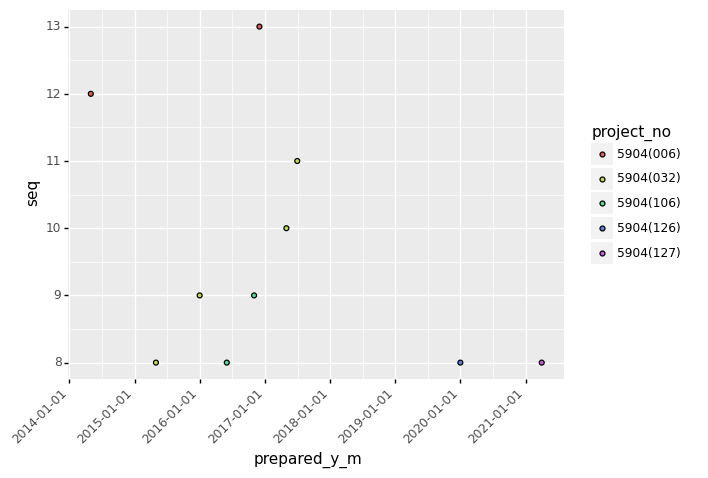

<ggplot: (8742431465466)>

In [35]:
#curious to see where/when the sequences fall on a timeline for different projects
(
    df_hc 
    >> filter(_.seq >= 8) 
    >> group_by(_.project_no)
    >> ggplot(aes("prepared_y_m", "seq", fill="project_no")) + geom_point() + theme(axis_text_x = element_text(angle = 45 , hjust=1))
    
)

### ER Funds

In [36]:
df_hc >> filter(_.prefix == "ER")

,Unnamed: 0,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,warning,projectID,projectNO,compare_id_locode,prepared_y_m,prepared_y
2,2,Obligated,ER,4820(004),Humboldt County,2018-12-07,2018-12-21,2018-12-21,2018-12-21,2018-12-27,45499.64,0.00,51394.58,Authorized,5904,1,E-76 approved on,14.00,0.00,6.00,NaN,Mattole Rd Pm 43.17,Permanent Restoration,5,2018-12-06,2018-12-07,NON-MPO,NaN,4820,4,False,2018-12-01,2018-01-01
179,179,Obligated,ER,32L0(132),Humboldt County,2018-11-09,2018-11-19,2018-11-19,2018-11-21,2018-11-28,80597.93,0.00,82857.19,Authorized,5904,1,E-76 approved on,11.00,2.00,7.00,NaN,"Mattole Rd Pm 36.06 - 36.10, Humboldt County",Emergency Opening Work. Install Warning Signs ...,1,2018-11-07,2018-11-08,NON-MPO,NaN,32L0,132,False,2018-11-01,2018-01-01
180,180,Obligated,ER,32L0(136),Humboldt County,2018-11-07,2018-11-19,2018-11-19,2018-11-21,2018-11-28,7797.89,0.00,8645.78,Authorized,5904,1,E-76 approved on,12.00,2.00,7.00,NaN,"Mattole Rd Pm 6.50, Humboldt County",Emergency Opening,1,2018-11-07,2018-11-07,NON-MPO,NaN,32L0,136,False,2018-11-01,2018-01-01
181,181,Obligated,ER,32L0(138),Humboldt County,2018-11-16,2018-11-19,2018-11-19,2018-11-21,2018-11-28,11764.54,0.00,12442.17,Authorized,5904,1,E-76 approved on,3.00,2.00,7.00,NaN,Alderpoint Road Pm 36.98,Eo Er,1,2018-11-15,2018-11-16,NON-MPO,NaN,32L0,138,False,2018-11-01,2018-01-01
182,182,Obligated,ER,32L0(164),Humboldt County,2018-11-15,2018-11-19,2018-11-19,2018-11-21,2018-11-28,55422.20,0.00,55676.75,Authorized,5904,1,E-76 approved on,4.00,2.00,7.00,NaN,Mattole Road Pm 11.05 -11.29,Eo -er,1,2018-11-15,2018-11-15,NON-MPO,NaN,32L0,164,False,2018-11-01,2018-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20184,20186,HQ,ER,32L0(319),Humboldt County,2021-08-04,2021-10-01,NaT,NaT,NaT,-5261.13,10418.68,21271.47,..,5904,1,Prepared on 8/4/2021,94.00,NaN,NaN,NaN,In Humboldt County On Mattole Road Pm 5.10,Permanent Restoration,4,2021-06-29,2021-08-16,NON-MPO,NaN,32L0,319,False,2021-08-01,2021-01-01
20185,20187,HQ,ER,32L0(320),Humboldt County,2021-08-03,2021-10-05,NaT,NaT,NaT,-10392.51,21845.64,13463.69,..,5904,1,Prepared on 8/3/2021,63.00,NaN,NaN,NaN,"In Humboldt County, Mattole Rd Pm 9.00",Permanent Restoration,4,2021-08-03,2021-08-20,NON-MPO,NaN,32L0,320,False,2021-08-01,2021-01-01
20186,20188,HQ,ER,32L0(325),Humboldt County,2021-08-05,2021-09-27,NaT,NaT,NaT,0.00,467168.87,527695.55,..,5904,1,Prepared on 8/5/2021,61.00,NaN,NaN,NaN,Mattole Rd Pm 36.16,Repair Roadway Slumping And Settlement.,4,2021-07-28,2021-09-22,NON-MPO,NaN,32L0,325,False,2021-08-01,2021-01-01
20187,20189,HQ,ER,32L0(326),Humboldt County,2021-09-29,2021-09-29,NaT,NaT,NaT,0.00,9154.33,10340.38,..,5904,1,Prepared on 9/29/2021,37.00,NaN,NaN,NaN,Humboldt County On Murray Rd Pm 5.57,Permanent Restoration,7,2021-08-23,2021-08-23,NON-MPO,NaN,32L0,326,False,2021-09-01,2021-01-01


#### Using ER funds for Mattole Road 

In [37]:
#just saw "Mattole Road" on the first entry. Searching using this string. 
df_hc >> filter(_.project_location.str.contains("Mattole R"))

,Unnamed: 0,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,warning,projectID,projectNO,compare_id_locode,prepared_y_m,prepared_y
2,2,Obligated,ER,4820(004),Humboldt County,2018-12-07,2018-12-21,2018-12-21,2018-12-21,2018-12-27,45499.64,0.00,51394.58,Authorized,5904,1,E-76 approved on,14.00,0.00,6.00,NaN,Mattole Rd Pm 43.17,Permanent Restoration,5,2018-12-06,2018-12-07,NON-MPO,NaN,4820,4,False,2018-12-01,2018-01-01
61,61,Obligated,BPMPL,5904(157),Humboldt County,2018-11-13,2018-12-06,2018-12-14,2018-12-14,2018-12-14,21619.00,0.00,24420.00,Authorized,5904,1,E-76 approved on,0.00,8.00,0.00,HBPLOCAL,On Lindley Road At Mattole River (bridge 04c0075),Bridge Preventive Maintenance: Replace Wood Wh...,2,2018-11-13,2018-12-06,NON-MPO,NaN,5904,157,True,2018-11-01,2018-01-01
179,179,Obligated,ER,32L0(132),Humboldt County,2018-11-09,2018-11-19,2018-11-19,2018-11-21,2018-11-28,80597.93,0.00,82857.19,Authorized,5904,1,E-76 approved on,11.00,2.00,7.00,NaN,"Mattole Rd Pm 36.06 - 36.10, Humboldt County",Emergency Opening Work. Install Warning Signs ...,1,2018-11-07,2018-11-08,NON-MPO,NaN,32L0,132,False,2018-11-01,2018-01-01
180,180,Obligated,ER,32L0(136),Humboldt County,2018-11-07,2018-11-19,2018-11-19,2018-11-21,2018-11-28,7797.89,0.00,8645.78,Authorized,5904,1,E-76 approved on,12.00,2.00,7.00,NaN,"Mattole Rd Pm 6.50, Humboldt County",Emergency Opening,1,2018-11-07,2018-11-07,NON-MPO,NaN,32L0,136,False,2018-11-01,2018-01-01
182,182,Obligated,ER,32L0(164),Humboldt County,2018-11-15,2018-11-19,2018-11-19,2018-11-21,2018-11-28,55422.20,0.00,55676.75,Authorized,5904,1,E-76 approved on,4.00,2.00,7.00,NaN,Mattole Road Pm 11.05 -11.29,Eo -er,1,2018-11-15,2018-11-15,NON-MPO,NaN,32L0,164,False,2018-11-01,2018-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19245,19247,Obligated,ACST-ER,32L0(111),Humboldt County,2021-05-13,2021-05-13,2021-05-26,2021-06-08,2021-06-15,0.00,55684.81,62899.38,Authorized,5904,1,E-76 approved on,28.00,26.00,7.00,NaN,Mattole Road (f3c010) Pm 43.62,"Grind Existing Roadway, Recompact/augment Road...",5,2021-04-15,2021-04-15,NON-MPO,NaN,32L0,111,False,2021-05-01,2021-01-01
19831,19833,Obligated,ER,32L0(250),Humboldt County,2021-07-23,2021-08-16,2021-08-24,2021-09-23,2021-09-27,-13744.37,0.00,-15525.09,Authorized,5904,1,E-76 approved on,28.00,38.00,4.00,NaN,Mattole Road Pm 11.05-11.29,Permanent Restoration,4,2021-07-19,2021-08-16,NON-MPO,NaN,32L0,250,False,2021-07-01,2021-01-01
20184,20186,HQ,ER,32L0(319),Humboldt County,2021-08-04,2021-10-01,NaT,NaT,NaT,-5261.13,10418.68,21271.47,..,5904,1,Prepared on 8/4/2021,94.00,NaN,NaN,NaN,In Humboldt County On Mattole Road Pm 5.10,Permanent Restoration,4,2021-06-29,2021-08-16,NON-MPO,NaN,32L0,319,False,2021-08-01,2021-01-01
20185,20187,HQ,ER,32L0(320),Humboldt County,2021-08-03,2021-10-05,NaT,NaT,NaT,-10392.51,21845.64,13463.69,..,5904,1,Prepared on 8/3/2021,63.00,NaN,NaN,NaN,"In Humboldt County, Mattole Rd Pm 9.00",Permanent Restoration,4,2021-08-03,2021-08-20,NON-MPO,NaN,32L0,320,False,2021-08-01,2021-01-01


In [38]:
(df_hc >> filter(_.project_location.str.contains("Mattole R"))
     >> count(_.prefix))

,prefix,n
0,ACST-ER,24
1,ACSTP,7
2,BPMPL,3
3,BRLS,2
4,ER,122


In [39]:
(df_hc >> filter(_.project_location.str.contains("Mattole R"))
     >> group_by(_.prefix, _.prepared_y)
     >> count(_.projectID)
     >> arrange(-_.n)
)

,prefix,prepared_y,projectID,n
18,ER,2018-01-01,20A0,32
21,ER,2019-01-01,32L0,28
19,ER,2018-01-01,32L0,18
0,ACST-ER,2019-01-01,32L0,16
24,ER,2020-01-01,32L0,10
26,ER,2020-01-01,4400,8
27,ER,2021-01-01,32L0,7
13,ER,2015-01-01,20A0,6
2,ACST-ER,2021-01-01,32L0,5
3,ACSTP,2018-01-01,32L0,4


In [40]:
(df_hc >> filter(_.project_location.str.contains("Mattole R"))
     >> group_by(_.prepared_y, _.prefix)
     >> count(_.type_of_work)
     >> arrange(_.prepared_y)
)

,prepared_y,prefix,type_of_work,n
0,2014-01-01,ER,Permanent Restoration,1
1,2014-01-01,ER,Storm Damage Repair,1
2,2014-01-01,ER,"Storm Damage, Permanent Restor",1
3,2015-01-01,ER,Emergency Opening,6
4,2015-01-01,ER,Emergency Relief,2
...,...,...,...,...
60,2021-01-01,ACST-ER,Stabilize Roadway With Earth Retaining Structu...,1
61,2021-01-01,ACSTP,Permanent Restoration,1
62,2021-01-01,BRLS,Bridge Replacement (br # 04c0055),1
63,2021-01-01,ER,Permanent Restoration,6


#### ER project numbers

In [41]:
df_hc >> filter(_.prefix=="ER") >> count(_.projectID) >> arrange(-_.n)

,projectID,n
2,32L0,172
0,20A0,117
4,4400,52
5,4820,31
3,40A0,6
1,28L4,3


In [42]:
df_hc >> filter(_.prefix == "ER") >> count(_.project_no) >> arrange(-_.n)

,project_no,n
63,32L0(121),4
70,32L0(132),4
89,32L0(234),4
90,32L0(235),4
99,32L0(270),4
...,...,...
134,4400(020),1
152,4400(062),1
153,4400(071),1
157,4820(007),1


### What projects are grouped by date

In [43]:
df_hc.sample(3)

,Unnamed: 0,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,warning,projectID,projectNO,compare_id_locode,prepared_y_m,prepared_y
14565,14565,Obligated,ACST-ER,32L0(122),Humboldt County,2019-09-04,2019-09-05,2019-09-17,2019-09-17,2019-09-19,0.00,47637.98,53810.00,Authorized,5904,1,E-76 approved on,2.00,12.00,2.00,NaN,Alderpoint Road Pm:41.45,Permanent Restoration,2,2019-09-03,2019-09-03,NON-MPO,NaN,32L0,122,False,2019-09-01,2019-01-01
14580,14580,Obligated,ACST-ER,32L0(295),Humboldt County,2019-09-06,2019-09-09,2019-09-19,2019-09-19,2019-09-23,0.00,97183.80,109775.00,Authorized,5904,1,E-76 approved on,3.00,10.00,4.00,NaN,"In Humboldt County, On Alderpoint Road Pm 10.5...",Permanent Restoration,2,2019-09-06,2019-09-06,NON-MPO,NaN,32L0,295,False,2019-09-01,2019-01-01
2884,2884,Obligated,HSIP,5904(160),Humboldt County,2017-08-30,2017-11-29,2017-12-12,2017-12-13,2017-12-19,100500.00,0.00,100500.00,Authorized,5904,1,E-76 approved on,105.00,14.00,6.00,HSIP_RURL,Central And Myrtle Avenue Signals In The Towns...,Pedestrian Countdown Signals,2,2017-06-29,2017-08-16,NON-MPO,NaN,5904,160,True,2017-08-01,2017-01-01


In [44]:
(df_hc 
    >> group_by(_.prefix)
    >> count(_.prepared_y) 
    >> arrange(-_.n)
    >> filter(_.n > 1)
)

,prefix,prepared_y,n
48,ER,2018-01-01,146
49,ER,2019-01-01,82
50,ER,2020-01-01,49
0,ACST-ER,2019-01-01,39
45,ER,2015-01-01,31
44,ER,2014-01-01,30
51,ER,2021-01-01,26
1,ACST-ER,2020-01-01,14
2,ACST-ER,2021-01-01,12
5,ACSTP,2020-01-01,11


In [45]:
(df_hc 
    >> filter(_.prefix == "HSIP")
    >> count(_.prepared_y) 
    >> arrange(-_.n)
    >> filter(_.n > 1)
)

,prepared_y,n
5,2019-01-01,5
6,2020-01-01,5
3,2017-01-01,4
7,2021-01-01,2


In [46]:
(df_hc 
    >> filter(_.prefix == "ER")
    >> count(_.prepared_y) 
     >> arrange(-_.n)
     >> filter(_.n>1)
)

,prepared_y,n
4,2018-01-01,146
5,2019-01-01,82
6,2020-01-01,49
1,2015-01-01,31
0,2014-01-01,30
7,2021-01-01,26
3,2017-01-01,10
2,2016-01-01,7


In [47]:
(df_hc 
    >> filter(_.prefix == "ER")
    >> count(_.prepared_y_m) 
     >> arrange(-_.n)
     >> filter(_.n>1)
)

,prepared_y_m,n
27,2018-03-01,48
29,2018-06-01,41
35,2019-01-01,25
43,2019-11-01,25
42,2019-10-01,20
1,2014-05-01,18
32,2018-10-01,17
33,2018-11-01,13
30,2018-07-01,12
58,2021-04-01,12


In [48]:
(df_hc 
    >> filter(_.prefix == "ER", _.prepared_y_m == '2019-10-01')
    >> count(_.project_no)
)

,project_no,n
0,32L0(003),1
1,32L0(111),1
2,32L0(114),1
3,32L0(117),1
4,32L0(125),1
5,32L0(130),1
6,32L0(132),1
7,32L0(160),1
8,32L0(230),1
9,32L0(235),1


In [49]:
(df_hc 
    >> filter(_.prefix == "ER", _.prepared_y_m == '2019-10-01')
    >> count(_.project_no)
)

,project_no,n
0,32L0(003),1
1,32L0(111),1
2,32L0(114),1
3,32L0(117),1
4,32L0(125),1
5,32L0(130),1
6,32L0(132),1
7,32L0(160),1
8,32L0(230),1
9,32L0(235),1


In [50]:
df_hc >> filter(_.prefix == "ER", _.prepared_y_m == '2019-10-01', _.project_no == '32L0(434)')


,Unnamed: 0,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,warning,projectID,projectNO,compare_id_locode,prepared_y_m,prepared_y
14874,14874,Obligated,ER,32L0(434),Humboldt County,2019-10-03,2019-10-03,2019-10-07,2019-10-09,2019-10-15,4337.97,-4337.97,0.00,Authorized,5904,1,E-76 approved on,0.00,6.00,6.00,NaN,Sprowel Creek Rd Pm 0.90,Permanent Restoration,2,2019-10-03,2019-10-03,NON-MPO,NaN,32L0,434,False,2019-10-01,2019-01-01


In [51]:
## looking for more instances of this project code 
df_hc >> filter(_.prefix == "ER", _.project_no == '32L0(434)')

,Unnamed: 0,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,warning,projectID,projectNO,compare_id_locode,prepared_y_m,prepared_y
14874,14874,Obligated,ER,32L0(434),Humboldt County,2019-10-03,2019-10-03,2019-10-07,2019-10-09,2019-10-15,4337.97,-4337.97,0.00,Authorized,5904,1,E-76 approved on,0.00,6.00,6.00,NaN,Sprowel Creek Rd Pm 0.90,Permanent Restoration,2,2019-10-03,2019-10-03,NON-MPO,NaN,32L0,434,False,2019-10-01,2019-01-01
15620,15622,Obligated,ER,32L0(434),Humboldt County,2019-11-05,2019-11-05,2020-01-08,2020-01-16,2020-01-21,-4337.97,0.00,-4900.00,Authorized,5904,1,E-76 approved on,19.00,72.00,5.00,NaN,Sprowel Creek Rd Pm 0.90,Permanent Restoration,3,2019-10-17,2019-10-17,NON-MPO,NaN,32L0,434,False,2019-11-01,2019-01-01


In [52]:
(df_hc 
    >> filter(_.prefix == "ER", _.prepared_y_m == '2018-03-01')
    >> count(_.project_no)
)

,project_no,n
0,20A0(001),1
1,20A0(002),1
2,20A0(003),1
3,20A0(004),1
4,20A0(005),1
5,20A0(006),1
6,20A0(007),1
7,20A0(008),1
8,20A0(009),1
9,20A0(010),1


In [53]:
(df_hc 
    >> filter(_.prefix == "ACST-ER", _.prepared_y_m == '2019-09-01')
    >> count(_.project_no)
)

,project_no,n
0,32L0(111),1
1,32L0(117),1
2,32L0(122),1
3,32L0(152),1
4,32L0(234),1
5,32L0(240),1
6,32L0(247),1
7,32L0(250),1
8,32L0(271),1
9,32L0(282),1


In [54]:
(df_hc 
    >> filter(_.prefix == "ER")
    >> group_by(_.prepared_y_m)
)

,Unnamed: 0,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,warning,projectID,projectNO,compare_id_locode,prepared_y_m,prepared_y
2,2,Obligated,ER,4820(004),Humboldt County,2018-12-07,2018-12-21,2018-12-21,2018-12-21,2018-12-27,45499.64,0.00,51394.58,Authorized,5904,1,E-76 approved on,14.00,0.00,6.00,NaN,Mattole Rd Pm 43.17,Permanent Restoration,5,2018-12-06,2018-12-07,NON-MPO,NaN,4820,4,False,2018-12-01,2018-01-01
179,179,Obligated,ER,32L0(132),Humboldt County,2018-11-09,2018-11-19,2018-11-19,2018-11-21,2018-11-28,80597.93,0.00,82857.19,Authorized,5904,1,E-76 approved on,11.00,2.00,7.00,NaN,"Mattole Rd Pm 36.06 - 36.10, Humboldt County",Emergency Opening Work. Install Warning Signs ...,1,2018-11-07,2018-11-08,NON-MPO,NaN,32L0,132,False,2018-11-01,2018-01-01
180,180,Obligated,ER,32L0(136),Humboldt County,2018-11-07,2018-11-19,2018-11-19,2018-11-21,2018-11-28,7797.89,0.00,8645.78,Authorized,5904,1,E-76 approved on,12.00,2.00,7.00,NaN,"Mattole Rd Pm 6.50, Humboldt County",Emergency Opening,1,2018-11-07,2018-11-07,NON-MPO,NaN,32L0,136,False,2018-11-01,2018-01-01
181,181,Obligated,ER,32L0(138),Humboldt County,2018-11-16,2018-11-19,2018-11-19,2018-11-21,2018-11-28,11764.54,0.00,12442.17,Authorized,5904,1,E-76 approved on,3.00,2.00,7.00,NaN,Alderpoint Road Pm 36.98,Eo Er,1,2018-11-15,2018-11-16,NON-MPO,NaN,32L0,138,False,2018-11-01,2018-01-01
182,182,Obligated,ER,32L0(164),Humboldt County,2018-11-15,2018-11-19,2018-11-19,2018-11-21,2018-11-28,55422.20,0.00,55676.75,Authorized,5904,1,E-76 approved on,4.00,2.00,7.00,NaN,Mattole Road Pm 11.05 -11.29,Eo -er,1,2018-11-15,2018-11-15,NON-MPO,NaN,32L0,164,False,2018-11-01,2018-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20184,20186,HQ,ER,32L0(319),Humboldt County,2021-08-04,2021-10-01,NaT,NaT,NaT,-5261.13,10418.68,21271.47,..,5904,1,Prepared on 8/4/2021,94.00,NaN,NaN,NaN,In Humboldt County On Mattole Road Pm 5.10,Permanent Restoration,4,2021-06-29,2021-08-16,NON-MPO,NaN,32L0,319,False,2021-08-01,2021-01-01
20185,20187,HQ,ER,32L0(320),Humboldt County,2021-08-03,2021-10-05,NaT,NaT,NaT,-10392.51,21845.64,13463.69,..,5904,1,Prepared on 8/3/2021,63.00,NaN,NaN,NaN,"In Humboldt County, Mattole Rd Pm 9.00",Permanent Restoration,4,2021-08-03,2021-08-20,NON-MPO,NaN,32L0,320,False,2021-08-01,2021-01-01
20186,20188,HQ,ER,32L0(325),Humboldt County,2021-08-05,2021-09-27,NaT,NaT,NaT,0.00,467168.87,527695.55,..,5904,1,Prepared on 8/5/2021,61.00,NaN,NaN,NaN,Mattole Rd Pm 36.16,Repair Roadway Slumping And Settlement.,4,2021-07-28,2021-09-22,NON-MPO,NaN,32L0,325,False,2021-08-01,2021-01-01
20187,20189,HQ,ER,32L0(326),Humboldt County,2021-09-29,2021-09-29,NaT,NaT,NaT,0.00,9154.33,10340.38,..,5904,1,Prepared on 9/29/2021,37.00,NaN,NaN,NaN,Humboldt County On Murray Rd Pm 5.57,Permanent Restoration,7,2021-08-23,2021-08-23,NON-MPO,NaN,32L0,326,False,2021-09-01,2021-01-01


### Looking at Projects with 32L0

In [55]:
### Looking at Projects with 32L0

In [56]:
df_hc >> filter(_.projectID == "32L0")
             

,Unnamed: 0,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,warning,projectID,projectNO,compare_id_locode,prepared_y_m,prepared_y
179,179,Obligated,ER,32L0(132),Humboldt County,2018-11-09,2018-11-19,2018-11-19,2018-11-21,2018-11-28,80597.93,0.00,82857.19,Authorized,5904,1,E-76 approved on,11.00,2.00,7.00,NaN,"Mattole Rd Pm 36.06 - 36.10, Humboldt County",Emergency Opening Work. Install Warning Signs ...,1,2018-11-07,2018-11-08,NON-MPO,NaN,32L0,132,False,2018-11-01,2018-01-01
180,180,Obligated,ER,32L0(136),Humboldt County,2018-11-07,2018-11-19,2018-11-19,2018-11-21,2018-11-28,7797.89,0.00,8645.78,Authorized,5904,1,E-76 approved on,12.00,2.00,7.00,NaN,"Mattole Rd Pm 6.50, Humboldt County",Emergency Opening,1,2018-11-07,2018-11-07,NON-MPO,NaN,32L0,136,False,2018-11-01,2018-01-01
181,181,Obligated,ER,32L0(138),Humboldt County,2018-11-16,2018-11-19,2018-11-19,2018-11-21,2018-11-28,11764.54,0.00,12442.17,Authorized,5904,1,E-76 approved on,3.00,2.00,7.00,NaN,Alderpoint Road Pm 36.98,Eo Er,1,2018-11-15,2018-11-16,NON-MPO,NaN,32L0,138,False,2018-11-01,2018-01-01
182,182,Obligated,ER,32L0(164),Humboldt County,2018-11-15,2018-11-19,2018-11-19,2018-11-21,2018-11-28,55422.20,0.00,55676.75,Authorized,5904,1,E-76 approved on,4.00,2.00,7.00,NaN,Mattole Road Pm 11.05 -11.29,Eo -er,1,2018-11-15,2018-11-15,NON-MPO,NaN,32L0,164,False,2018-11-01,2018-01-01
183,183,Obligated,ER,32L0(219),Humboldt County,2018-11-07,2018-11-19,2018-11-19,2018-11-21,2018-11-28,13724.04,0.00,15502.14,Authorized,5904,1,E-76 approved on,12.00,2.00,7.00,NaN,"Murray Road Pm 5.57, Humboldt County",Emergency Opening,1,2018-11-07,2018-11-07,NON-MPO,NaN,32L0,219,False,2018-11-01,2018-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20183,20185,HQ,ER,32L0(282),Humboldt County,2021-08-16,2021-09-30,NaT,NaT,NaT,0.00,64581.35,72948.57,..,5904,1,Prepared on 8/16/2021,48.00,NaN,NaN,NaN,"Alderpoint Rd Pm 43.55, Humboldt County Ca",Permanent Restoration,4,2021-08-13,2021-08-16,NON-MPO,NaN,32L0,282,False,2021-08-01,2021-01-01
20184,20186,HQ,ER,32L0(319),Humboldt County,2021-08-04,2021-10-01,NaT,NaT,NaT,-5261.13,10418.68,21271.47,..,5904,1,Prepared on 8/4/2021,94.00,NaN,NaN,NaN,In Humboldt County On Mattole Road Pm 5.10,Permanent Restoration,4,2021-06-29,2021-08-16,NON-MPO,NaN,32L0,319,False,2021-08-01,2021-01-01
20185,20187,HQ,ER,32L0(320),Humboldt County,2021-08-03,2021-10-05,NaT,NaT,NaT,-10392.51,21845.64,13463.69,..,5904,1,Prepared on 8/3/2021,63.00,NaN,NaN,NaN,"In Humboldt County, Mattole Rd Pm 9.00",Permanent Restoration,4,2021-08-03,2021-08-20,NON-MPO,NaN,32L0,320,False,2021-08-01,2021-01-01
20186,20188,HQ,ER,32L0(325),Humboldt County,2021-08-05,2021-09-27,NaT,NaT,NaT,0.00,467168.87,527695.55,..,5904,1,Prepared on 8/5/2021,61.00,NaN,NaN,NaN,Mattole Rd Pm 36.16,Repair Roadway Slumping And Settlement.,4,2021-07-28,2021-09-22,NON-MPO,NaN,32L0,325,False,2021-08-01,2021-01-01


In [57]:
df_hc >> filter(_.projectID == "32L0", _.type_of_work.str.contains("Roadway"))

,Unnamed: 0,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,warning,projectID,projectNO,compare_id_locode,prepared_y_m,prepared_y
179,179,Obligated,ER,32L0(132),Humboldt County,2018-11-09,2018-11-19,2018-11-19,2018-11-21,2018-11-28,80597.93,0.00,82857.19,Authorized,5904,1,E-76 approved on,11.00,2.00,7.00,NaN,"Mattole Rd Pm 36.06 - 36.10, Humboldt County",Emergency Opening Work. Install Warning Signs ...,1,2018-11-07,2018-11-08,NON-MPO,NaN,32L0,132,False,2018-11-01,2018-01-01
1126,1126,Obligated,ER,32L0(111),Humboldt County,2018-06-27,2018-06-27,2018-06-27,2018-06-27,2018-07-03,7657.84,-7657.84,0.00,Authorized,5904,1,E-76 approved on,0.00,0.00,6.00,NaN,Mattole Road (f3c010) Pm 43.62,"Grind Existing Roadway, Recompact/augment Road...",2,2018-06-27,2018-06-27,NON-MPO,NaN,32L0,111,False,2018-06-01,2018-01-01
1130,1130,Obligated,ER,32L0(127),Humboldt County,2018-06-25,2018-06-25,2018-06-28,2018-06-29,2018-07-03,23672.92,-23672.92,0.00,Authorized,5904,1,E-76 approved on,7.00,4.00,4.00,NaN,Bell Springs Road (c8a010) Pm 2.20,Reconstruct Roadway Embankment With Sub-draina...,2,2018-06-18,2018-06-18,NON-MPO,NaN,32L0,127,False,2018-06-01,2018-01-01
2218,2218,Obligated,ACSTP,32L0(127),Humboldt County,2018-01-19,2018-02-16,2018-03-06,2018-03-06,2018-03-16,0.00,23672.92,26740.00,Authorized,5904,1,E-76 approved on,42.00,18.00,10.00,NaN,Bell Springs Road (c8a010) Pm 2.20,Reconstruct Roadway Embankment With Sub-draina...,1,2018-01-05,2018-01-05,NON-MPO,NaN,32L0,127,False,2018-01-01,2018-01-01
2245,2245,Obligated,ACSTP,32L0(111),Humboldt County,2018-01-19,2018-02-16,2018-03-06,2018-03-06,2018-03-15,0.00,7657.84,8650.00,Authorized,5904,1,E-76 approved on,42.00,18.00,9.00,NaN,Mattole Road (f3c010) Pm 43.62,"Grind Existing Roadway, Recompact/augment Road...",1,2018-01-05,2018-01-05,NON-MPO,NaN,32L0,111,False,2018-01-01,2018-01-01
13035,13035,Obligated,ER,32L0(117),Humboldt County,2018-12-20,2018-12-21,2019-01-22,2019-02-25,2019-02-28,23929.65,0.00,27030.00,Authorized,5904,1,E-76 approved on,1.00,66.00,3.00,NaN,Mattole Road Pm 42.76,Stabilize Roadway With Earth Retaining Structu...,1,2018-12-20,2018-12-20,NON-MPO,NaN,32L0,117,False,2018-12-01,2018-01-01
13037,13037,Obligated,ACSTP,32L0(128),Humboldt County,2019-03-12,2019-03-12,2019-05-10,2019-05-20,2019-05-22,0.00,98135.50,110850.00,Authorized,5904,1,E-76 approved on,1.00,69.00,2.00,NaN,Bell Spring Road Pm 4.96,Restoration Of Failing Roadway.,1,2019-03-11,2019-03-12,NON-MPO,NaN,32L0,128,False,2019-03-01,2019-01-01
13038,13038,Obligated,ER,32L0(134),Humboldt County,2019-01-14,2019-01-14,2019-02-25,2019-03-04,2019-03-06,50649.91,0.00,50663.65,Authorized,5904,1,E-76 approved on,0.00,49.00,2.00,NaN,Mattole Road Pm. 42.76,"Eo By Agency, County And Contractor Repaired R...",1,2019-01-14,2019-01-14,NON-MPO,NaN,32L0,134,False,2019-01-01,2019-01-01
13043,13043,Obligated,ER,32L0(173),Humboldt County,2019-01-31,2019-02-05,2019-03-19,2019-03-26,2019-03-27,8788.71,0.00,8788.71,Authorized,5904,1,E-76 approved on,5.00,49.00,1.00,NaN,Alderpoint Road Pm10.52 To Pm10.53,Storm Damage Repair Of Roadway Settlement,1,2019-01-31,2019-01-31,NON-MPO,NaN,32L0,173,False,2019-01-01,2019-01-01
13054,13054,Obligated,ER,32L0(293),Humboldt County,2019-01-09,2019-01-10,2019-02-15,2019-02-15,2019-02-26,6781.39,0.00,7660.00,Authorized,5904,1,E-76 approved on,1.00,36.00,11.00,NaN,"Alderpoint Road, Pm 8.15",Saturated Base Causing Roadway & Shoulder Sett...,1,2019-01-09,2019-01-09,NON-MPO,NaN,32L0,293,False,2019-01-01,2019-01-01


In [58]:
df_hc_prefix_count = df_hc >> filter(_.projectID == "32L0") >> count(_.prefix) >> arrange(-_.n)

In [59]:
df_hc_prefix_count

,prefix,n
2,ER,172
0,ACST-ER,63
1,ACSTP,15


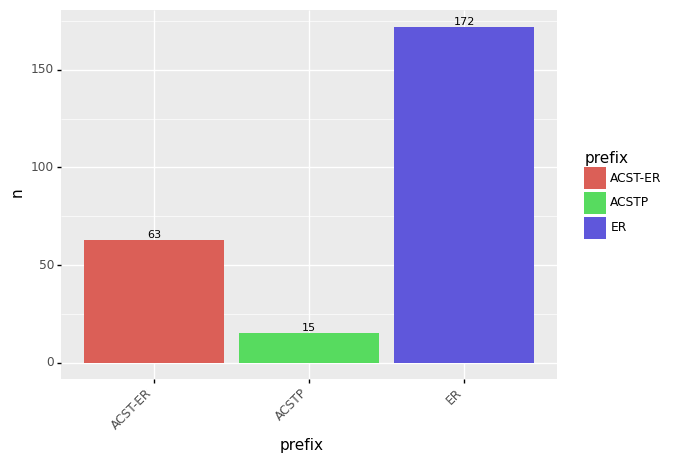

<ggplot: (8759870389492)>

In [60]:
(
    df_hc_prefix_count 
    >> ggplot(aes("prefix", "n", fill="prefix")) 
        + geom_col() 
        + theme(axis_text_x = element_text(angle = 45 , hjust=1))
        + geom_text(aes(label='n'),                                   
             size=8, va='bottom', format_string='{}')
)

In [61]:
df_hc >> filter(_.projectID == "32L0") >> count(_.seq) >> arrange(-_.n)

,seq,n
0,1,71
1,2,71
2,3,51
3,4,37
4,5,11
5,6,7
6,7,2


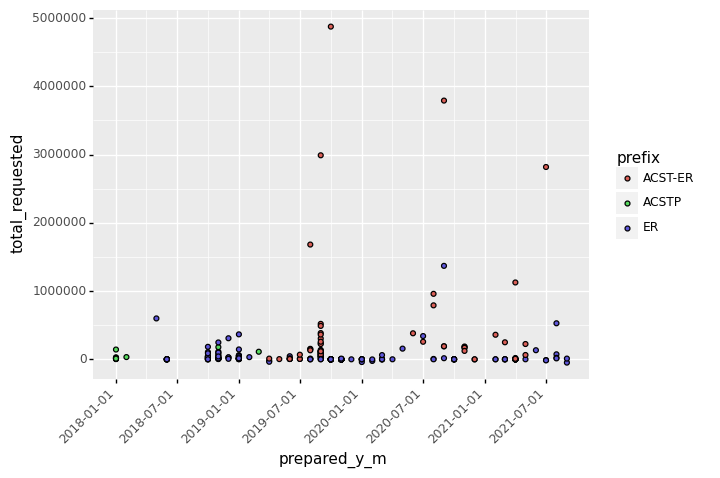

<ggplot: (8759870400964)>

In [62]:
(
    df_hc 
    >> filter(_.projectID == "32L0") 
    >> group_by(_.projectNO)
    >> ggplot(aes("prepared_y_m", "total_requested", fill="prefix")) + geom_point() + theme(axis_text_x = element_text(angle = 45 , hjust=1))
    
)

In [63]:
(df_hc 
    >> filter(_.prefix == "ACST-ER", _.projectID=="32L0")
    >> group_by(_.project_no)
    >> count(_.prepared_y)
    >> arrange(-_.n)
)

,project_no,prepared_y,n
11,32L0(121),2019-01-01,2
15,32L0(127),2020-01-01,2
20,32L0(230),2019-01-01,2
34,32L0(273),2020-01-01,2
53,32L0(326),2019-01-01,2
0,32L0(111),2019-01-01,1
1,32L0(111),2021-01-01,1
2,32L0(114),2019-01-01,1
3,32L0(115),2019-01-01,1
4,32L0(115),2020-01-01,1


In [64]:
df_hc >> filter(_.prefix == "ACST-ER", _.project_no=="32L0(127)")

,Unnamed: 0,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,warning,projectID,projectNO,compare_id_locode,prepared_y_m,prepared_y
17844,17846,Obligated,ACST-ER,32L0(127),Humboldt County,2020-09-10,2020-09-25,2020-09-26,2021-01-19,2021-01-20,0.00,168499.15,190330.00,Authorized,5904,1,E-76 approved on,16.00,116.00,1.00,NaN,Bell Springs Road (c8a010) Pm 2.20,Reconstruct Roadway Embankment With Sub-draina...,3,2020-09-09,2020-09-24,NON-MPO,NaN,32L0,127,False,2020-09-01,2020-01-01
18081,18083,Obligated,ACST-ER,32L0(127),Humboldt County,2020-09-10,2020-09-25,2020-09-26,2021-01-19,2021-01-20,0.00,168499.15,190330.00,Authorized,5904,1,E-76 approved on,16.00,116.00,1.00,NaN,Bell Springs Road (c8a010) Pm 2.20,Reconstruct Roadway Embankment With Sub-draina...,3,2020-09-09,2020-09-24,NON-MPO,NaN,32L0,127,False,2020-09-01,2020-01-01
18767,18769,Obligated,ACST-ER,32L0(127),Humboldt County,2021-03-29,2021-03-29,2021-03-29,2021-03-30,2021-04-01,0.00,0.00,0.00,Authorized,5904,1,E-76 approved on,0.00,1.00,2.00,NaN,Bell Springs Road (c8a010) Pm 2.20,Reconstruct Roadway Embankment With Sub-draina...,4,2021-03-29,2021-03-29,NON-MPO,NaN,32L0,127,False,2021-03-01,2021-01-01


##### **!** Double entry or double funding...

* all entries are the same... 

### Looking at Projects with 5904

In [65]:
df_hc >> filter(_.projectID == "5904")

,Unnamed: 0,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,warning,projectID,projectNO,compare_id_locode,prepared_y_m,prepared_y
0,0,Obligated,BPMPL,5904(121),Humboldt County,2018-12-18,2018-12-18,2018-12-18,2018-12-18,2018-12-27,0.00,0.00,0.00,Authorized,5904,1,E-76 approved on,NaN,0.00,9.00,HBPLOCAL,14 Bridges In Humboldt County,Bridge Preventive Maintenance - Deck Joints,3,NaT,NaT,NON-MPO,NaN,5904,121,True,2018-12-01,2018-01-01
61,61,Obligated,BPMPL,5904(157),Humboldt County,2018-11-13,2018-12-06,2018-12-14,2018-12-14,2018-12-14,21619.00,0.00,24420.00,Authorized,5904,1,E-76 approved on,0.00,8.00,0.00,HBPLOCAL,On Lindley Road At Mattole River (bridge 04c0075),Bridge Preventive Maintenance: Replace Wood Wh...,2,2018-11-13,2018-12-06,NON-MPO,NaN,5904,157,True,2018-11-01,2018-01-01
277,277,Obligated,BPMPL,5904(121),Humboldt County,2018-11-02,2018-11-02,2018-11-02,2018-11-06,2018-11-07,-81905.86,0.00,-85411.69,Authorized,5904,1,E-76 approved on,0.00,4.00,1.00,HBPLOCAL,14 Bridges In Humboldt County,Bridge Preventive Maintenance - Deck Joints,2,2018-11-02,2018-11-02,NON-MPO,NaN,5904,121,True,2018-11-01,2018-01-01
278,278,Obligated,RPSTP,5904(143),Humboldt County,2018-07-06,2018-10-01,2018-11-06,2018-11-07,2018-11-07,550000.00,0.00,550000.00,Authorized,5904,1,E-76 approved on,102.00,37.00,0.00,BIKEPED-A,Humboldt County Between Bracut And Eureka Ajt ...,Class 1 Multi-use Trail (tc),2,2018-06-21,2018-06-21,NON-MPO,NaN,5904,143,True,2018-07-01,2018-01-01
467,467,Obligated,BPMPL,5904(135),Humboldt County,2018-09-28,2018-09-28,2018-09-28,2018-10-10,2018-10-15,-16797.31,0.00,-17799.93,Authorized,5904,1,E-76 approved on,NaN,12.00,5.00,HBPLOCAL,"China Creek Bridge 04c0019, And Nissen Slough ...",Bridge Preventative Maintenance,2,NaT,NaT,NON-MPO,NaN,5904,135,True,2018-09-01,2018-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20020,20022,DISTRICT,ATP,5904(151),Humboldt County,2021-10-22,NaT,NaT,NaT,NaT,1358000.00,0.00,1358000.00,..,5904,1,Prepared on 10/22/2021,NaN,NaN,NaN,NaN,On Sr255 From The Dean Avenue/pacific Avenue I...,Class 1 Multi-use Trail (tc),5,NaT,NaT,NON-MPO,NaN,5904,151,True,2021-10-01,2021-01-01
20021,20023,DISTRICT,BPMPL,5904(156),Humboldt County,2021-08-05,NaT,NaT,NaT,NaT,629249.10,0.00,710775.00,Hold Obligation authority or apportionment bal...,5904,1,Prepared on 8/5/2021,NaN,NaN,NaN,NaN,Various Locations In Humboldt County,Bridge Preventive Maintenance: Minor Concrete ...,3,NaT,NaT,NON-MPO,NaN,5904,156,True,2021-08-01,2021-01-01
20022,20024,DISTRICT,BRLO,5904(165),Humboldt County,2021-09-13,NaT,NaT,NaT,NaT,9607.61,0.00,9607.61,..,5904,1,Prepared on 9/13/2021,NaN,NaN,NaN,NaN,In Humboldt County On Jacoby Creek Bridge At B...,Bridge Rehabilitation Child Project Revegetati...,2,NaT,NaT,NON-MPO,NaN,5904,165,True,2021-09-01,2021-01-01
20023,20025,DISTRICT,HSIP,5904(181),Humboldt County,2021-10-20,NaT,NaT,NaT,NaT,154662.00,0.00,178643.00,Hold for FTIP amendment.,5904,1,Prepared on 10/20/2021,NaN,NaN,NaN,NaN,Intersection Of Redwood Drive And Redway Drive...,Install Enhanced Pedestrian Crossing With Bulb...,3,NaT,NaT,NON-MPO,NaN,5904,181,True,2021-10-01,2021-01-01


In [66]:
df_hc >> filter(_.projectID == "5904", _.type_of_work.str.contains("Bridge"))

,Unnamed: 0,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,warning,projectID,projectNO,compare_id_locode,prepared_y_m,prepared_y
0,0,Obligated,BPMPL,5904(121),Humboldt County,2018-12-18,2018-12-18,2018-12-18,2018-12-18,2018-12-27,0.00,0.00,0.00,Authorized,5904,1,E-76 approved on,NaN,0.00,9.00,HBPLOCAL,14 Bridges In Humboldt County,Bridge Preventive Maintenance - Deck Joints,3,NaT,NaT,NON-MPO,NaN,5904,121,True,2018-12-01,2018-01-01
61,61,Obligated,BPMPL,5904(157),Humboldt County,2018-11-13,2018-12-06,2018-12-14,2018-12-14,2018-12-14,21619.00,0.00,24420.00,Authorized,5904,1,E-76 approved on,0.00,8.00,0.00,HBPLOCAL,On Lindley Road At Mattole River (bridge 04c0075),Bridge Preventive Maintenance: Replace Wood Wh...,2,2018-11-13,2018-12-06,NON-MPO,NaN,5904,157,True,2018-11-01,2018-01-01
277,277,Obligated,BPMPL,5904(121),Humboldt County,2018-11-02,2018-11-02,2018-11-02,2018-11-06,2018-11-07,-81905.86,0.00,-85411.69,Authorized,5904,1,E-76 approved on,0.00,4.00,1.00,HBPLOCAL,14 Bridges In Humboldt County,Bridge Preventive Maintenance - Deck Joints,2,2018-11-02,2018-11-02,NON-MPO,NaN,5904,121,True,2018-11-01,2018-01-01
467,467,Obligated,BPMPL,5904(135),Humboldt County,2018-09-28,2018-09-28,2018-09-28,2018-10-10,2018-10-15,-16797.31,0.00,-17799.93,Authorized,5904,1,E-76 approved on,NaN,12.00,5.00,HBPLOCAL,"China Creek Bridge 04c0019, And Nissen Slough ...",Bridge Preventative Maintenance,2,NaT,NaT,NON-MPO,NaN,5904,135,True,2018-09-01,2018-01-01
468,468,Obligated,BPMPL,5904(139),Humboldt County,2018-08-31,2018-10-01,2018-10-10,2018-10-12,2018-10-15,-123758.02,0.00,-132486.70,Authorized,5904,1,E-76 approved on,33.00,11.00,3.00,HBPLOCAL,Holmes Flat Road Over Larabee Low Level-eel River,Bridge Preventative Maintenance,3,2018-08-29,2018-08-29,NON-MPO,NaN,5904,139,True,2018-08-01,2018-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19249,19251,Obligated,BRLS,5904(127),Humboldt County,2021-04-29,2021-05-19,2021-05-28,2021-06-01,2021-06-15,-48480.20,0.00,-46125.83,Authorized,5904,1,E-76 approved on,264.00,13.00,14.00,HBPLOCAL,Williams Creek Bridge On Grizzly Bluff Road,Bridge Replacement,8,2020-08-28,2021-05-18,NON-MPO,NaN,5904,127,True,2021-04-01,2021-01-01
20019,20021,DISTRICT,BPMPL,5904(141),Humboldt County,2021-08-11,NaT,NaT,NaT,NaT,53348.54,0.00,60260.00,Hold for FTIP amendment.,5904,1,Prepared on 8/11/2021,NaN,NaN,NaN,NaN,In Humboldt County On Mccann Road Over The Eel...,Bridge Preventive Maintenance,5,NaT,NaT,NON-MPO,NaN,5904,141,True,2021-08-01,2021-01-01
20021,20023,DISTRICT,BPMPL,5904(156),Humboldt County,2021-08-05,NaT,NaT,NaT,NaT,629249.10,0.00,710775.00,Hold Obligation authority or apportionment bal...,5904,1,Prepared on 8/5/2021,NaN,NaN,NaN,NaN,Various Locations In Humboldt County,Bridge Preventive Maintenance: Minor Concrete ...,3,NaT,NaT,NON-MPO,NaN,5904,156,True,2021-08-01,2021-01-01
20022,20024,DISTRICT,BRLO,5904(165),Humboldt County,2021-09-13,NaT,NaT,NaT,NaT,9607.61,0.00,9607.61,..,5904,1,Prepared on 9/13/2021,NaN,NaN,NaN,NaN,In Humboldt County On Jacoby Creek Bridge At B...,Bridge Rehabilitation Child Project Revegetati...,2,NaT,NaT,NON-MPO,NaN,5904,165,True,2021-09-01,2021-01-01


In [67]:
## 88 rows of all bridge related funding obligations- appears from this small subset that HBPLOCAL is the FTIP Code, 
### yet, we have various Prefix Codes.

In [68]:
(df_hc 
    >> filter(_.projectID == "5904", _.type_of_work.str.contains("Bridge"))
    >> count(_.project_no) >> arrange(-_.n)
)

,project_no,n
11,5904(126),7
12,5904(127),7
4,5904(113),6
5,5904(118),5
9,5904(122),5
18,5904(141),5
2,5904(092),4
8,5904(121),4
16,5904(139),4
3,5904(112),3


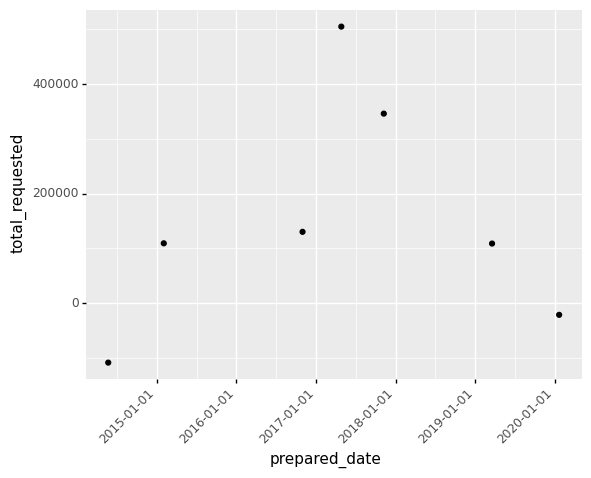

<ggplot: (8759870380141)>

In [69]:
## mplotting to see the timeline of one project 5904(126)
(df_hc 
    >> filter(_.project_no == "5904(126)")
    >> ggplot(aes("prepared_date", "total_requested")) + geom_point() + theme(axis_text_x = element_text(angle = 45 , hjust=1))
)